In [1]:
from simtk.openmm import app
import simtk.openmm as mm
from simtk import unit

In [2]:
pdb = app.PDBFile('ethane.pdb')
forcefield = app.ForceField('ethane.gaff2.xml')

/dartfs-hpc/rc/home/y/f0047qy/.conda/envs/labconda/lib/python3.7/site-packages/simtk/openmm/app/internal/pdbstructure.py:537: UserWarning: WARNING: duplicate atom (HETATM    2  C   LIG     1       2.559   0.089  -0.016  1.00  0.00           C  , HETATM    1  C   LIG     1       1.047   0.089  -0.016  1.00  0.00           C  )
  warnings.warn("WARNING: duplicate atom (%s, %s)" % (atom, old_atom._pdb_string(old_atom.serial_number, atom.alternate_location_indicator)))
/dartfs-hpc/rc/home/y/f0047qy/.conda/envs/labconda/lib/python3.7/site-packages/simtk/openmm/app/internal/pdbstructure.py:537: UserWarning: WARNING: duplicate atom (HETATM    4  H   LIG     1       0.662  -0.076   0.995  1.00  0.00           H  , HETATM    3  H   LIG     1       0.662   1.047  -0.378  1.00  0.00           H  )
  warnings.warn("WARNING: duplicate atom (%s, %s)" % (atom, old_atom._pdb_string(old_atom.serial_number, atom.alternate_location_indicator)))
/dartfs-hpc/rc/home/y/f0047qy/.conda/envs/labconda/lib/pytho

In [3]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)

integrator = mm.LangevinIntegrator(298.15*unit.kelvin, 5.0/unit.picoseconds, 2.0*unit.femtoseconds)
integrator.setConstraintTolerance(1e-5)

platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

In [4]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 11.124136261171031 kJ/mol
Potential energy after minimization is 4.389961756922238 kJ/mol


In [5]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 100, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*unit.kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
100,12.197952860462337,163.3841959139522
200,16.15759945968898,194.31950860681724
300,14.507469247109519,196.96735891930916
400,23.939154090945234,301.27922456308903
500,21.944871515914002,523.0096769639099
600,23.504781039406392,278.27562387360155
700,22.47533811900076,378.9401298794428
800,17.20993069069868,416.66015046602473
900,25.48962074849342,309.4181973885642
1000,16.484200627623526,365.47630525608014
1100,22.35399014659544,473.3300759681382
1200,37.58918676462445,309.87628609769394
1300,22.872974057670614,261.3349015097161
1400,24.842318604581788,535.9997038477285
1500,37.193691284630155,470.7477293880395
1600,24.121865532015875,285.00921104597427
1700,17.437710936364624,372.96579682951307
1800,18.7752616677421,406.5758080316393
1900,12.09683994614888,212.10339234112112
2000,14.763562262351718,190.44014391625328
2100,18.674759192271495,298.33514927606257
2200,19.951608397810578,262.65413078525853
2300,28.3

In [6]:
import time as time

print('Running Production...')

# Begin timer
tinit=time.time()

# Clear simulation reporters
simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
simulation.reporters.append(app.DCDReporter('ethane_sim.dcd', 100))

# run the simulation for 1.0x10^7 steps - 20 ns
simulation.step(10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

Running Production...
#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
250000,500.0000000016593,14.835847996122848,355.7080164349603,0
500000,999.9999999901769,14.720495093470515,391.3853178142632,4.23e+03
750000,1499.9999999783536,17.39900148815516,198.85741932838596,4.4e+03
1000000,1999.9999999665301,35.267659530625174,174.75716143794367,4.25e+03
1250000,2499.9999999547067,18.287193729598183,337.4230416806842,4.18e+03
1500000,2999.9999999428833,24.647615233561904,392.1384809489703,3.9e+03
1750000,3499.99999993106,37.30657999958823,518.0560492605789,3.99e+03
2000000,3999.9999999192364,13.04135500452702,319.91150820327357,4.18e+03
2250000,4499.9999999992715,11.562755754118541,327.2189386277954,4.35e+03
2500000,5000.000000101135,23.233125637612165,196.65604992059028,4.49e+03
2750000,5500.000000202998,28.894269130848052,285.9198261576303,4.59e+03
3000000,6000.000000304862,22.453320993209218,220.92670048190715,4.65e+03
3250000,6500.000000406725,20.957762

In [7]:
import mdtraj as md

traj = md.load('ethane_sim.dcd', top='ethane.pdb')

In [8]:
import nglview as ngl

visualize = ngl.show_mdtraj(traj)
visualize

NGLWidget(max_frame=99999)

In [9]:
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C,C,1,LIG,0,
1,2,C,C,1,LIG,0,
2,3,H,H,1,LIG,0,
3,4,H,H,1,LIG,0,
4,5,H,H,1,LIG,0,
5,6,H,H,1,LIG,0,
6,7,H,H,1,LIG,0,
7,8,H,H,1,LIG,0,


In [10]:
bond_indices = [0, 1] # atoms to define the bond length
bond_length = md.compute_distances(traj, [bond_indices])

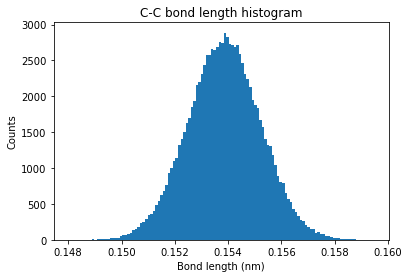

In [11]:
import matplotlib.pyplot as plt

bondcounts, binedges, otherstuff = plt.hist(bond_length, bins=120)
plt.title('C-C bond length histogram')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.show()